In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
house = pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.shape

(1460, 81)

In [4]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
house_data_numerics = house.select_dtypes(exclude=['object'])
house_data_numerics.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
len(house_data_numerics.columns)

38

In [7]:
print(house_data_numerics.isnull().sum())
print(house_data_numerics.isna().sum())

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64
Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8


In [8]:
house_data_numerics.describe().round(decimals = 2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,730.50,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,1.00,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [9]:
house.shape

(1460, 81)

In [10]:
house_data_objects = house.select_dtypes(include = ['object'])
house_data_objects.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
print(len(house_data_objects.columns))

43


Text(0.5, 1.0, 'sale price of house distribution')

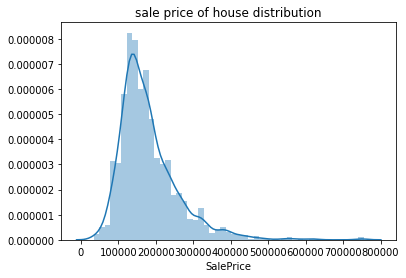

In [12]:
target = house.SalePrice
sns.distplot(target)
plt.title('sale price of house distribution')

Text(0.5, 1.0, 'Sale price Distribution')

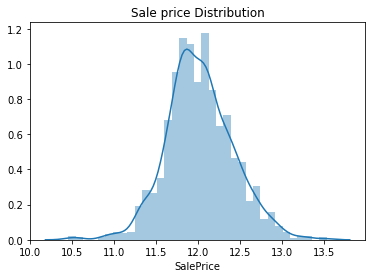

In [13]:
sns.distplot(np.log(target))
plt.title('Sale price Distribution')

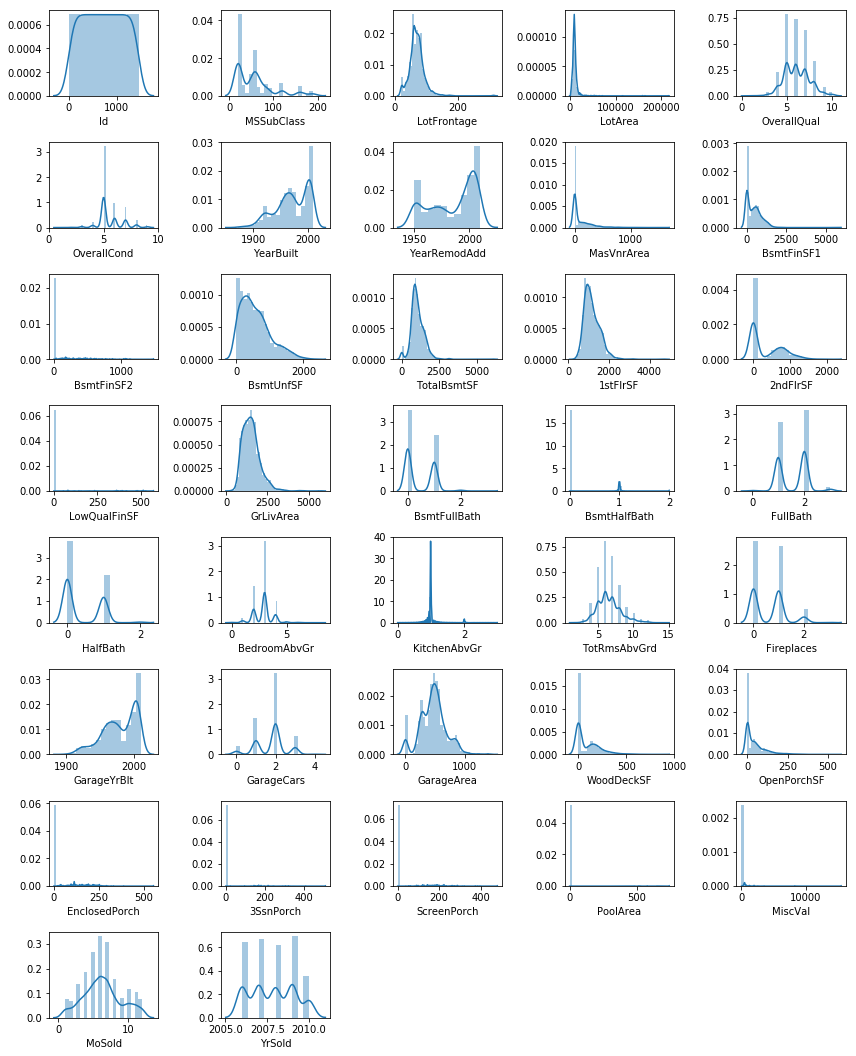

In [14]:
house_num_attributes = house_data_numerics.drop('SalePrice',axis= 1).copy()
fig = plt.figure(figsize=(12,18))
for i in range(len(house_num_attributes.columns)):
    fig.add_subplot(10,5,i+1)
    sns.distplot(house_num_attributes.iloc[:,i].dropna())
    plt.xlabel(house_num_attributes.columns[i])
plt.tight_layout()
plt.show()

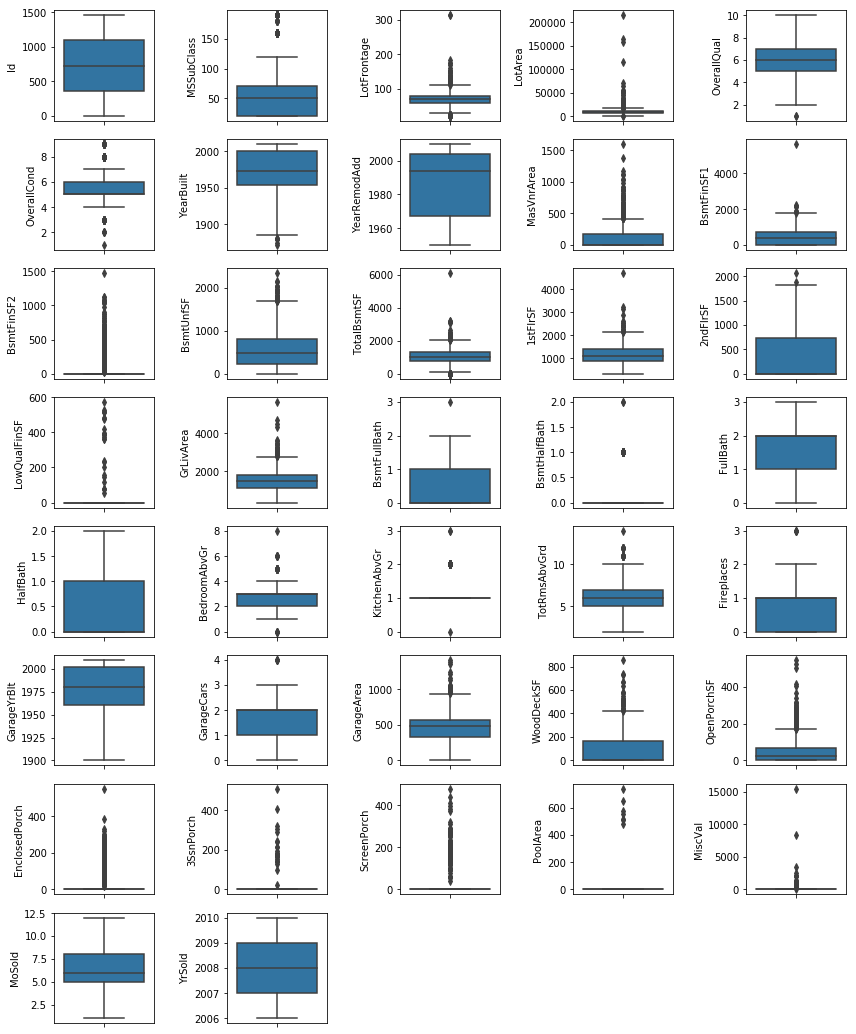

In [15]:
fig = plt.figure(figsize=(12,18))
for i in range(len(house_num_attributes.columns)):
    fig.add_subplot(10,5,i+1)
    sns.boxplot(y=house_num_attributes.iloc[:,i])
plt.tight_layout()
plt.show()

[]

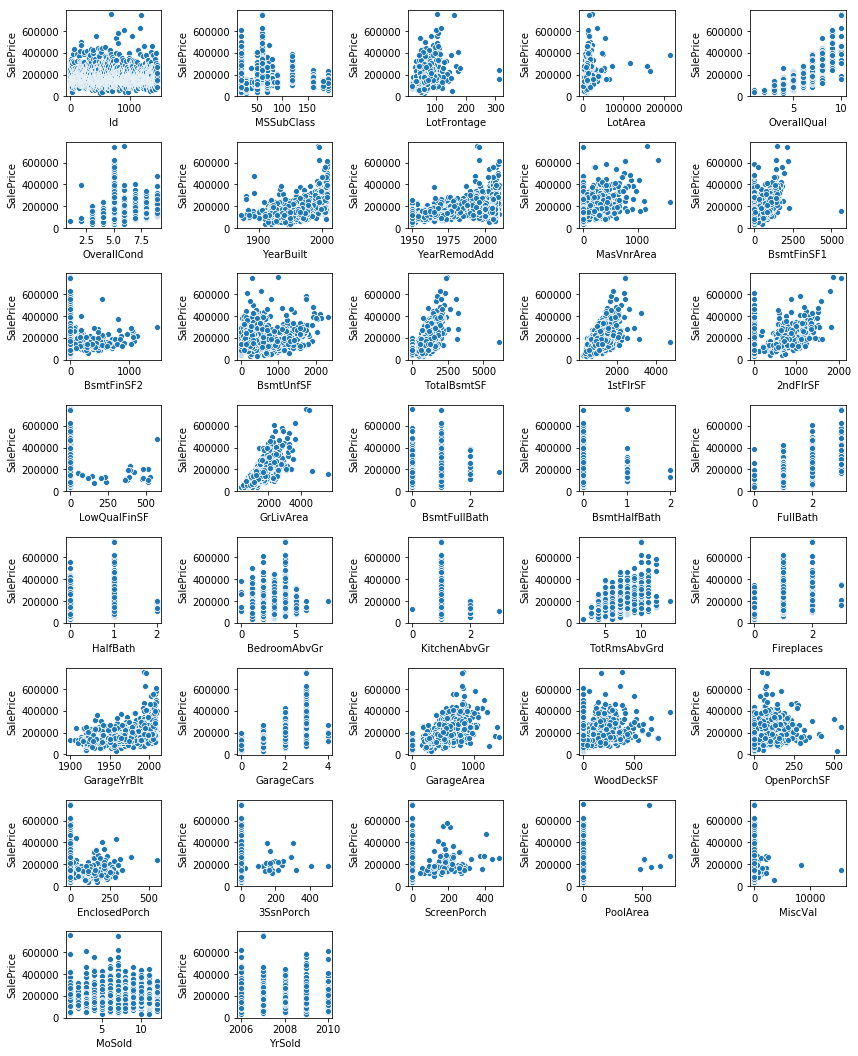

In [16]:
fig = plt.figure(figsize=(12,18))
for i in range(len(house_num_attributes.columns)):
    fig.add_subplot(10,5,i+1)
    sns.scatterplot(x=house_num_attributes.iloc[:,i],y=target)
plt.tight_layout()
plt.plot()

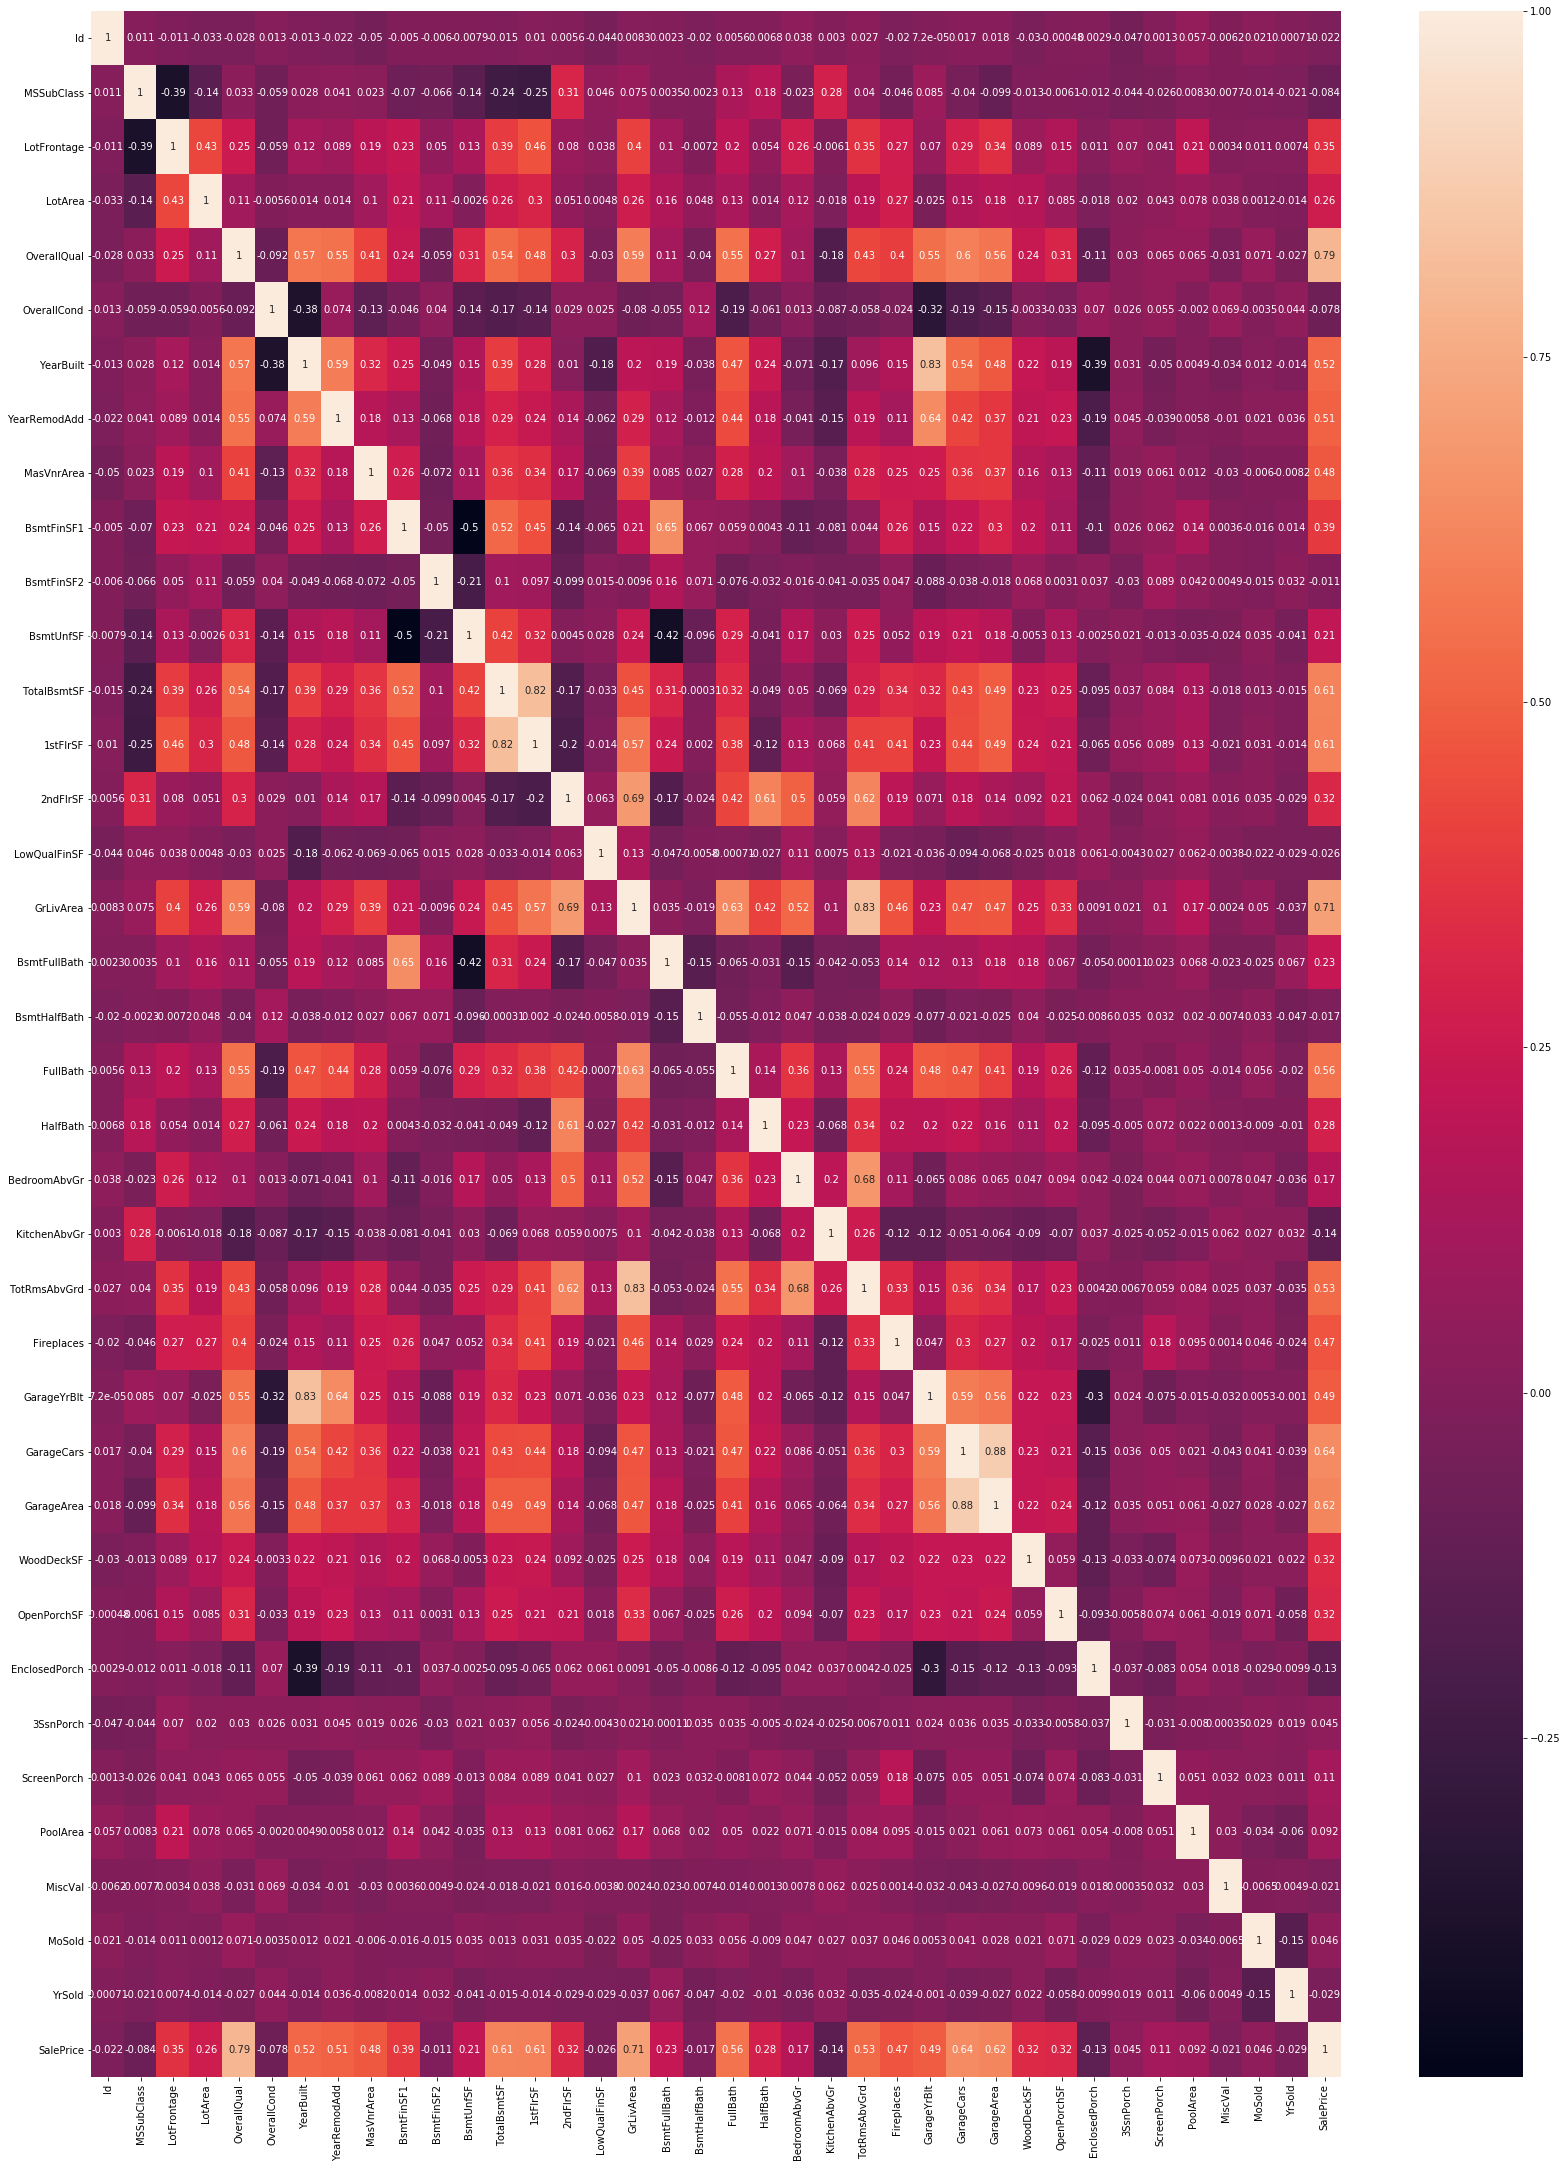

In [17]:
f,ax = plt.subplots(figsize=(28,38))
correlation = house.corr()
sns.heatmap(correlation,annot = True)
plt.show()

In [18]:
# correlation.sort_values(by=correlation['SalePrice'],ascending = False)
correlation['SalePrice'].sort_values(ascending=False).head(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

In [19]:
x_data = house.drop('SalePrice',axis = 1)

In [20]:
x_data = x_data.select_dtypes(exclude = 'object')

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_data, target, test_size=0.33, random_state=101)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(X_train)

C:\Users\Kunal\AppData\Local\conda\conda\envs\tensorflowenv\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [26]:
X_train = pd.DataFrame(data = scaler.transform(X_train),columns=X_train.columns,index=X_train.index)

In [27]:
X_test = pd.DataFrame(data = scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [28]:
overall = tf.feature_column.numeric_column('OverallQual ')
grlive = tf.feature_column.numeric_column('GrLivArea')
garage = tf.feature_column.numeric_column('GarageCars')
garagearea = tf.feature_column.numeric_column('GarageArea')
bsmt = tf.feature_column.numeric_column('TotalBsmtSF')
flr = tf.feature_column.numeric_column('1stFlrSF')
bath = tf.feature_column.numeric_column('FullBath')
abv = tf.feature_column.numeric_column('TotRmsAbvGrd')

In [41]:
feat_cols=[grlive,garage,garagearea,bsmt,flr,bath,abv]

In [42]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,
                    batch_size=10,num_epochs=1000,shuffle=True)

In [43]:
model = tf.estimator.DNNRegressor(hidden_units=[10,10,10,10],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Kunal\\AppData\\Local\\Temp\\tmpi9us5wwg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028752747240>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [44]:
model.train(input_fn=input_func,steps=20000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Kunal\AppData\Local\Temp\tmpi9us5wwg\model.ckpt.
INFO:tensorflow:loss = 249748100000.0, step = 1
INFO:tensorflow:global_step/sec: 229.665
INFO:tensorflow:loss = 243925190000.0, step = 101 (0.440 sec)
INFO:tensorflow:global_step/sec: 305.09
INFO:tensorflow:loss = 33757557000.0, step = 201 (0.328 sec)
INFO:tensorflow:global_step/sec: 320.943
INFO:tensorflow:loss = 17043304000.0, step = 301 (0.308 sec)
INFO:tensorflow:global_step/sec: 275.067
INFO:tensorflow:loss = 7154686500.0, step = 401 (0.368 sec)
INFO:tensorflow:global_step/sec: 266.336
INFO:tensorflow:loss = 21896070000.0, step = 501 (0.372 sec)
INFO:tensorflow:global_step/sec: 272.1
INFO:tensorflow:loss = 9767382000.0, step = 601 (0.372 sec)
INF

INFO:tensorflow:loss = 18100101000.0, step = 7701 (0.387 sec)
INFO:tensorflow:global_step/sec: 275.091
INFO:tensorflow:loss = 18209341000.0, step = 7801 (0.360 sec)
INFO:tensorflow:global_step/sec: 278.15
INFO:tensorflow:loss = 34550587000.0, step = 7901 (0.360 sec)
INFO:tensorflow:global_step/sec: 291.086
INFO:tensorflow:loss = 30780602000.0, step = 8001 (0.344 sec)
INFO:tensorflow:global_step/sec: 281.244
INFO:tensorflow:loss = 10454620000.0, step = 8101 (0.352 sec)
INFO:tensorflow:global_step/sec: 272.105
INFO:tensorflow:loss = 146638440000.0, step = 8201 (0.372 sec)
INFO:tensorflow:global_step/sec: 287.766
INFO:tensorflow:loss = 13249914000.0, step = 8301 (0.348 sec)
INFO:tensorflow:global_step/sec: 266.313
INFO:tensorflow:loss = 18044635000.0, step = 8401 (0.375 sec)
INFO:tensorflow:global_step/sec: 258.076
INFO:tensorflow:loss = 3452156000.0, step = 8501 (0.387 sec)
INFO:tensorflow:global_step/sec: 263.507
INFO:tensorflow:loss = 12382956000.0, step = 8601 (0.375 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 275.092
INFO:tensorflow:loss = 10306613000.0, step = 15701 (0.368 sec)
INFO:tensorflow:global_step/sec: 287.739
INFO:tensorflow:loss = 61279625000.0, step = 15801 (0.348 sec)
INFO:tensorflow:global_step/sec: 278.149
INFO:tensorflow:loss = 26286330000.0, step = 15901 (0.352 sec)
INFO:tensorflow:global_step/sec: 281.274
INFO:tensorflow:loss = 54828940000.0, step = 16001 (0.360 sec)
INFO:tensorflow:global_step/sec: 287.74
INFO:tensorflow:loss = 6497580000.0, step = 16101 (0.348 sec)
INFO:tensorflow:global_step/sec: 275.091
INFO:tensorflow:loss = 11240108000.0, step = 16201 (0.360 sec)
INFO:tensorflow:global_step/sec: 278.148
INFO:tensorflow:loss = 23681716000.0, step = 16301 (0.364 sec)
INFO:tensorflow:global_step/sec: 284.471
INFO:tensorflow:loss = 24598184000.0, step = 16401 (0.348 sec)
INFO:tensorflow:global_step/sec: 271.409
INFO:tensorflow:loss = 76287680000.0, step = 16501 (0.368 sec)
INFO:tensorflow:global_step/sec: 281.273
INFO:tensorflow:loss = 10

In [45]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [46]:
prediction_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,
                                    batch_size=10,num_epochs=1,shuffle=False)

In [47]:
predict = model.predict(prediction_input_func)

In [48]:
predictions=list(predict)
predictions

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Kunal\AppData\Local\Temp\tmpi9us5wwg\model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([213680.42], dtype=float32)},
 {'predictions': array([146055.97], dtype=float32)},
 {'predictions': array([173623.5], dtype=float32)},
 {'predictions': array([299950.38], dtype=float32)},
 {'predictions': array([313192.28], dtype=float32)},
 {'predictions': array([125541.98], dtype=float32)},
 {'predictions': array([135750.81], dtype=float32)},
 {'predictions': array([144859.47], dtype=float32)},
 {'predictions': array([165196.23], dtype=float32)},
 {'predictions': array([148162.88], dtype=float32)},
 {'predictions': array([147617.42], dtype=float32)},
 {'predictions': array([180511.52], dtype=float32)},
 {'predictions': array([163498.89], dtype=float32)},
 {'predictions': array([158146.48], dtype=float32)},
 {'predictions': array([172738.45], dtype=float32)},
 {'predictions': array([170437.73], dtype=float32)},
 {'predictions': array([229418.55], dtype=float32)},
 {'predictions': array([116617.78], dtype=float32)},
 {'predictions': array([141638.31], dtype=float

In [49]:
final_pred = []
for pred in predictions:
    final_pred.append(pred['predictions'])

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
mse = mean_squared_error(y_test,final_pred)**0.5
mse

49724.51987804025

In [52]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000
